In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [183]:
df = pd.read_csv('telecom_customer_churn.csv')
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

### data analysis

#### Q1\ What is the most important reason for churn?

Text(0.5, 1.0, 'the most important reason for churn')

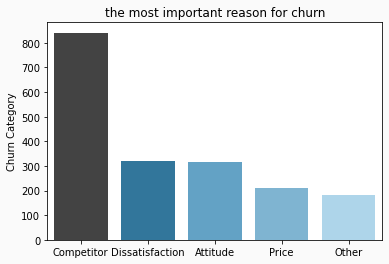

In [185]:
df_ex = df['Churn Category'].value_counts()
fig = plt.figure()
fig.patch.set_facecolor('#fafafa')
sns.barplot(x=df_ex.index, y=df_ex, palette=['#434343','#217bac', '#53a7d5','#71b8df','#a4d8f4' ])
plt.title('the most important reason for churn')

#### Q2\ Gender effect on churn?

In [186]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [187]:
df_ex = df[df['Customer Status'] == 'Churned'].groupby('Gender')[['Customer Status']].count()
df_ex

,Customer Status
Gender,
Female,939
Male,930


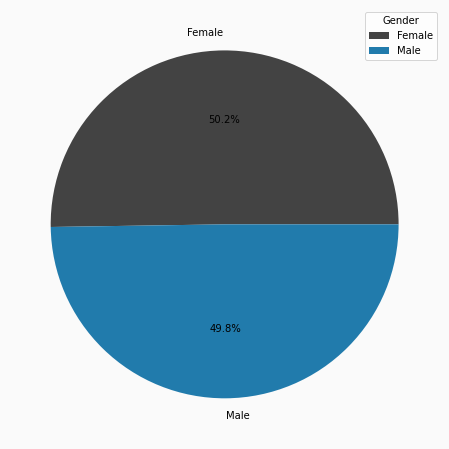

In [188]:
fig = plt.figure(figsize=[15,8])
fig.patch.set_facecolor('#fafafa')
plt.pie(df_ex['Customer Status'], labels=df_ex.index, colors=['#434343','#217bac'], autopct='%1.1f%%')
plt.legend(title='Gender')
plt.show() 

#### Q3\ the top 10 cities Total revenue

In [189]:
df_ex = df.groupby('City')[['Total Revenue']].sum().sort_values(by='Total Revenue', ascending=False)[:10]
df_ex

,Total Revenue
City,
Los Angeles,852725.23
San Diego,738416.01
Sacramento,353371.84
San Jose,326478.36
San Francisco,306995.99
Fresno,194430.25
Long Beach,185937.12
Escondido,155899.80
Oakland,154564.36


Text(0.5, 1.0, 'the top 10 cities Total revenue')

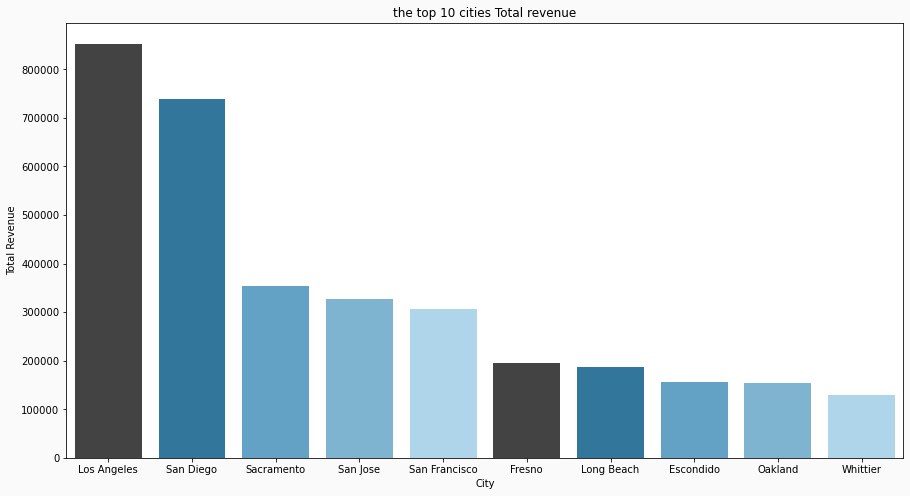

In [190]:
fig = plt.figure(figsize=[15,8])
fig.patch.set_facecolor('#fafafa')
sns.barplot(x=df_ex.index, y = df_ex['Total Revenue'],palette=['#434343','#217bac', '#53a7d5','#71b8df','#a4d8f4' ])
plt.title('the top 10 cities Total revenue')

#### Q4\ what is the churn situation of top 5 cities revenue

In [191]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [192]:
df_ex = df[df['City'].isin(df_ex.index[:5])]

In [193]:
df_ex.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
31,0048-PIHNL,Female,48,Yes,0,Los Angeles,90058,34.001617,-118.222274,5,...,Bank Withdrawal,20.45,900.90,0.0,0,2429.42,3330.32,Stayed,NaN,NaN
32,0052-DCKON,Male,28,Yes,0,Los Angeles,90063,34.044271,-118.185237,9,...,Bank Withdrawal,-2.00,7942.15,0.0,0,2888.82,10830.97,Stayed,NaN,NaN
37,0060-FUALY,Female,60,Yes,0,Los Angeles,90003,33.964131,-118.272783,4,...,Bank Withdrawal,94.75,5597.65,0.0,0,967.01,6564.66,Stayed,NaN,NaN
40,0067-DKWBL,Male,69,No,0,San Diego,92129,32.961064,-117.134917,0,...,Bank Withdrawal,49.25,91.10,0.0,0,87.98,179.08,Churned,Competitor,Competitor made better offer
43,0074-HDKDG,Male,46,Yes,0,San Jose,95126,37.327069,-121.916819,5,...,Bank Withdrawal,61.60,1611.00,44.9,0,161.25,1727.35,Stayed,NaN,NaN


c:\Users\Yousef\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'churn situation of top 5 cities revenue')

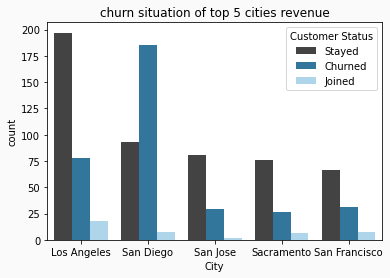

In [194]:
fig = plt.figure()
fig.patch.set_facecolor('#fafafa')
sns.countplot(df_ex['City'], hue=df_ex['Customer Status'], palette=['#434343','#217bac','#a4d8f4' ])
plt.title('churn situation of top 5 cities revenue')

#### Q5\ How are the offers affected the churn situation?

Text(0.5, 1.0, 'offer effect on the churn situation')

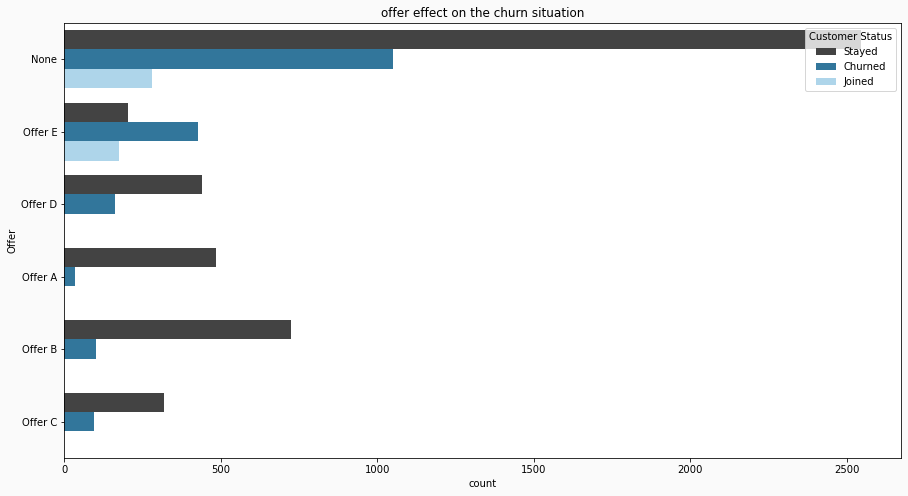

In [195]:
fig = plt.figure(figsize=[15,8])
fig.patch.set_facecolor('#fafafa')
sns.countplot(y=df['Offer'], hue=df['Customer Status'], palette=['#434343','#217bac','#a4d8f4' ])
plt.title('offer effect on the churn situation')

#### Q6\ internet type effect on customer satisfaction and revenue?

Text(0.5, 1.0, 'offer effect on the churn situation')

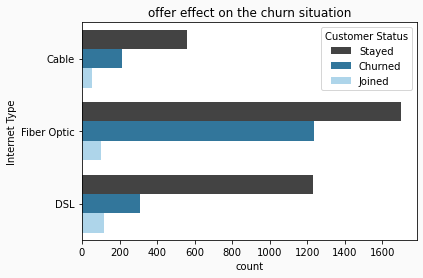

In [196]:
fig = plt.figure()
fig.patch.set_facecolor('#fafafa')
sns.countplot(y=df['Internet Type'], hue=df['Customer Status'], palette=['#434343','#217bac','#a4d8f4' ])
plt.title('offer effect on the churn situation')

In [197]:
df_ex = df.groupby('Internet Type')[['Total Revenue']].sum()
df_ex

,Total Revenue
Internet Type,
Cable,2228474.23
DSL,4549289.55
Fiber Optic,12408074.43


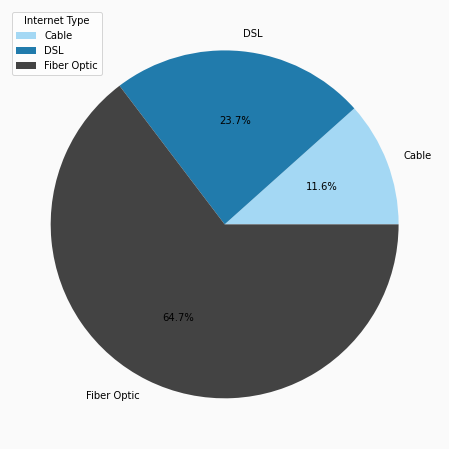

In [198]:
fig = plt.figure(figsize=[15,8])
fig.patch.set_facecolor('#fafafa')
plt.pie(df_ex['Total Revenue'], labels=df_ex.index, colors=['#a4d8f4','#217bac','#434343'], autopct='%1.1f%%')
plt.legend(title='Internet Type')
plt.show() 

#### Q7\ Servies effect on churn situation?

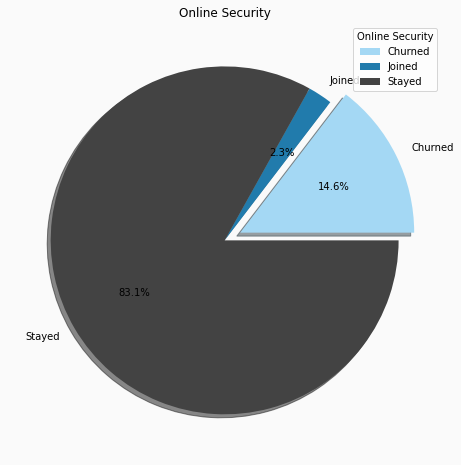

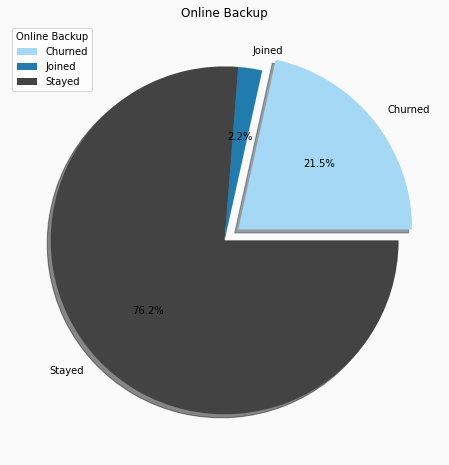

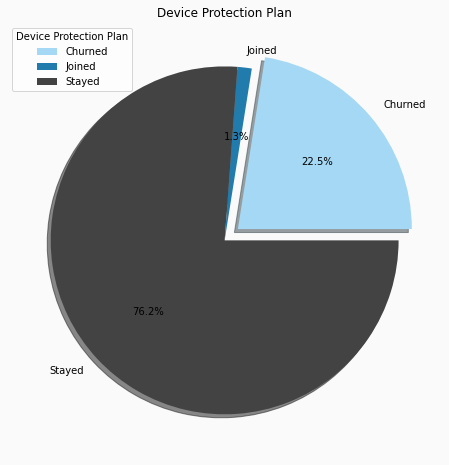

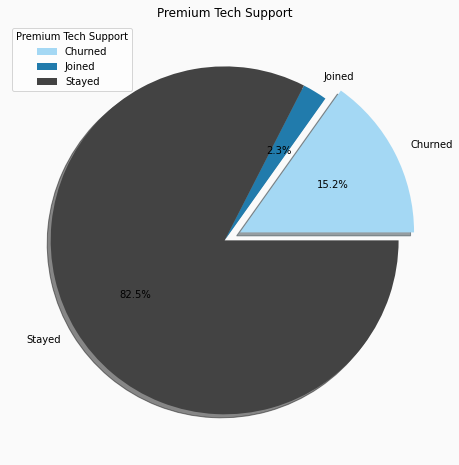

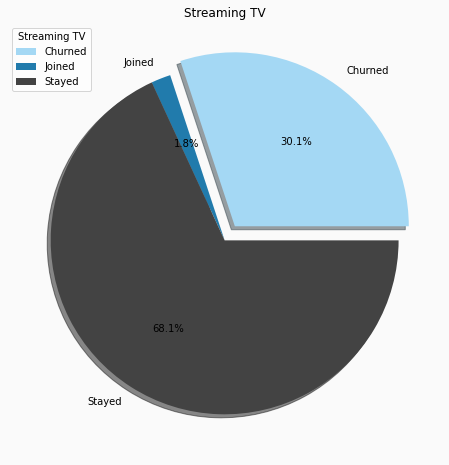

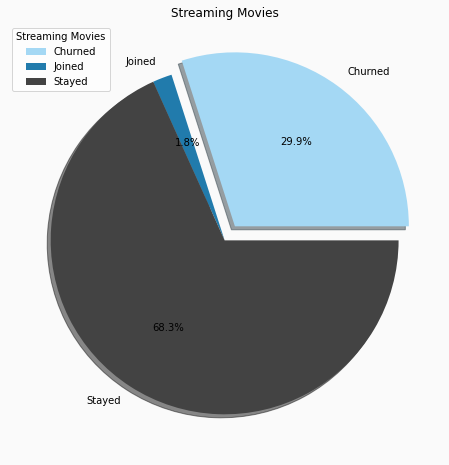

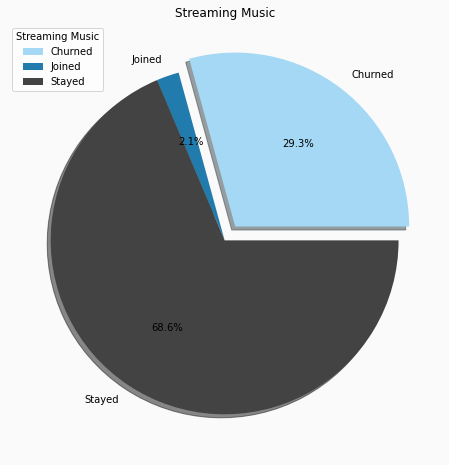

In [199]:
servies_list = df.columns[18:25]
for i in servies_list:
    df_ex = df[df[i] == 'Yes'].groupby('Customer Status')[[i]].count()
    fig = plt.figure(figsize=[15,8])
    fig.patch.set_facecolor('#fafafa')
    plt.pie(df_ex[i], labels=df_ex.index, colors=['#a4d8f4','#217bac','#434343'], autopct='%1.1f%%',explode=[0.1,0,0],shadow=True)
    plt.title(i)
    plt.legend(title=i)
    plt.show() 

#### Q8\ Most common age?
- creat a new column for age periods

In [200]:
def age_period(x):
    if x in range(10,21):
        x = '10-20'
        return x
    elif x in range(20,31):
        x = '20-30'
        return x
    elif x in range(30,41):
        x = '30-40'
        return x    
    elif x in range(40,51):
        x = '40-50'
        return x
    elif x in range(50,61):
        x = '50-60'
        return x    
    elif x > 60:
        x = '60+'
        return x    
df['Age Period'] = df['Age'].apply(age_period)

In [201]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Age Period
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,30-40
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,40-50
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,40-50
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,60+
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,60+


Text(0.5, 1.0, 'Most common age')

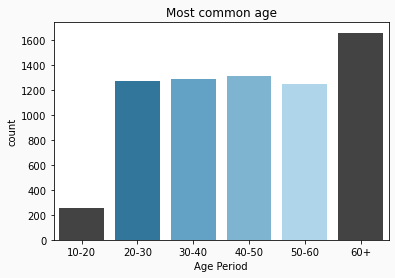

In [202]:
fig = plt.figure()
fig.patch.set_facecolor('#fafafa')
sns.countplot(x=df['Age Period'].sort_values(ascending=True) , palette=['#434343','#217bac', '#53a7d5','#71b8df','#a4d8f4' ])
plt.title('Most common age')

Text(0.5, 1.0, 'Most common age with churn situation')

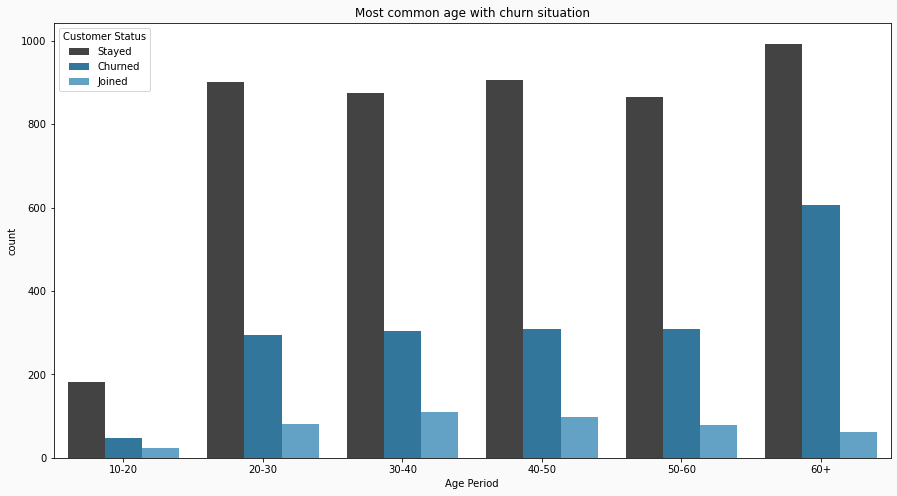

In [203]:
fig = plt.figure(figsize=[15,8])
fig.patch.set_facecolor('#fafafa')
sns.countplot(x=df['Age Period'].sort_values(ascending=True) , palette=['#434343','#217bac', '#53a7d5','#71b8df','#a4d8f4' ],hue=df['Customer Status'])
plt.title('Most common age with churn situation')

In [204]:
df['Churn Category'].value_counts().values

array([841, 321, 314, 211, 182], dtype=int64)

#### Q9\ Churn category & reasons? 

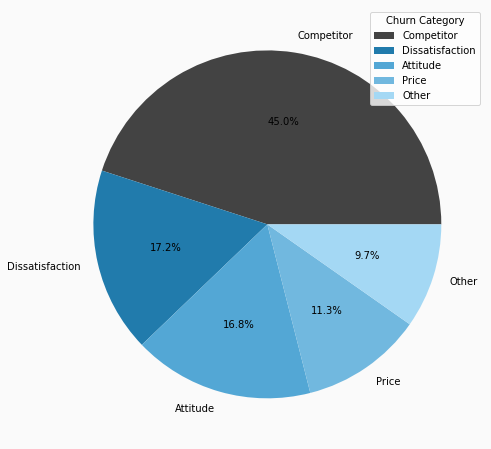

In [205]:
df_ex = df['Churn Category'].value_counts()
fig = plt.figure(figsize=[15,8])
fig.patch.set_facecolor('#fafafa')
plt.pie(df_ex.values, labels=df_ex.index, colors=['#434343','#217bac', '#53a7d5','#71b8df','#a4d8f4' ], autopct='%1.1f%%')
plt.legend(title='Churn Category')
plt.show() 

Text(0.5, 1.0, 'Churn Reason')

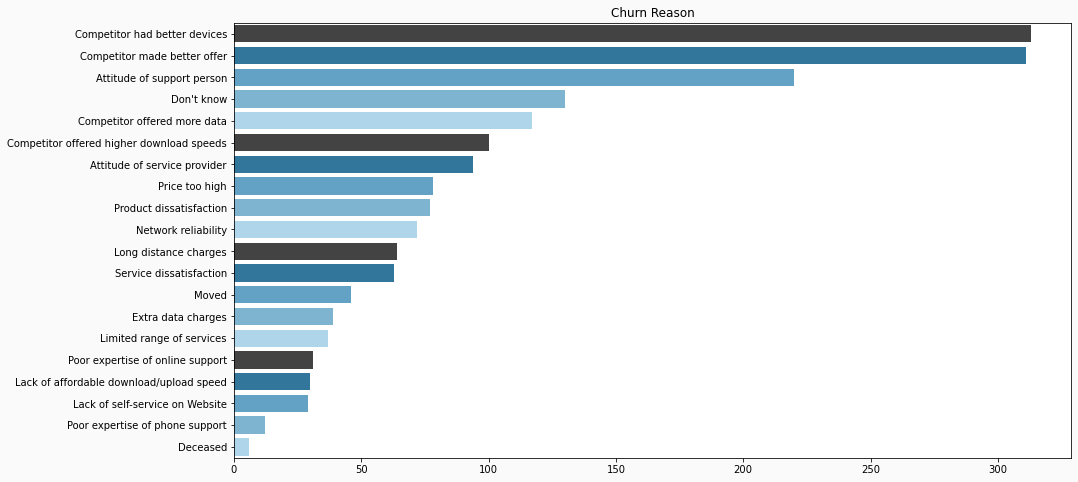

In [206]:
df_ex = df['Churn Reason'].value_counts()
fig = plt.figure(figsize=[15,8])
fig.patch.set_facecolor('#fafafa')
sns.barplot(y=df_ex.index,x=df_ex.values, palette=['#434343','#217bac', '#53a7d5','#71b8df','#a4d8f4' ])
plt.title('Churn Reason')


### Data preprocessing

In [207]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Age Period
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,30-40
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,40-50
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,40-50
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,60+
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,60+


In [ ]:
df = df.drop(['Customer ID', 'Married', 'Gender', 'Zip Code','Latitude','Longitude', ])